## Installing Qiskit


1. First of all, you need to install Python on your device (https://wiki.python.org/moin/BeginnersGuide/Download)

2. It is recommended that you create a separate virtual environment to run Qiskit (https://docs.python.org/3.10/tutorial/venv.html)

3. Once you create the virtual environment to run Qiskit, activate the environment to install necessary packages.

4. Install Qiskit SDK using:

```python
pip install qiskit

pip install qiskit-ibm-runtime
```


5. If you want to run a Jupyter notebook, you will need to install Jupyter in your environment as well. 

```python
pip install jupyter
```

and open your notebook with:

```python
jupyter notebook path/to/notebook.ipynb
```

6. You can also download and use VS Code (https://code.visualstudio.com/download)


Instructions from the page (https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit)

A detailed video instructions can be found here https://www.youtube.com/watch?v=dZWz4Gs_BuI

## Set up an IBM Cloud account


IBM offers access to quantum computers via open access plan. 

Since we have already set up our environment for Qiskit and Qiskit Runtime, now we need to create an IBM Cloud account.

1. Go to the page https://cloud.ibm.com/registration and create an account following the instructions.

2. You will be prompted to a screen to enter your email and other basic information, then verify your email address.

3. Create an instance, if necessary. Go to the IBM Quantum Platform dashboard (https://quantum.cloud.ibm.com/). If you have one or more instances shown, continue to the next step. Otherwise, follow these steps to create an instance.

    Make sure that you have the correct account selected from the account switcher in the top header. Click Create instance.

    - Choose a name and the plan to use.
    - If you are creating an instance of the Standard Plan, it is recommended that you set the total cost limit or the usage limit. (These values can be updated later.)
    - Scroll down to see the Terms link. After reading the terms, agree to the license agreements by checking the box in the bottom right corner of the page, and click Next.

    On the Plan inheritance page, leave the default setting (toggle is not enabled) and click Next if you're setting up an Open instance. If you are not setting up an Open instance and you want different QPUs to be available on this instance, enable the "Customize allocated compute resources" toggle, choose the QPUs you want this instance to be able to access, then click Next.

    Choose whether you want an access group to be created for this instance and click Create instance. For an Open instance, you probably don't need this access group, although creating one won't impact your usage unless you add another user to the group. This access group allows other users (collaborators) to share the time allocated to this instance. Collaborators can be added on the Users page.

    You can add or remove access groups at any time from IBM Cloud. See Setting up access groups for instructions.

4. Find your access credentials.
    Find your API key. From the dashboard, create your API key, then copy it to a secure location so you can use it for authentication.

5. If you are working in a trusted Python environment (such as on a personal laptop or workstation), use the save_account() method to save your credentials locally. (Skip to the next step if you are not using a trusted environment, such as a shared or public computer, to authenticate to IBM Cloud.) To use save_account(), activate a Python virtual environment. Then, run Python in your virtual environment and enter the following:

In [ ]:
token = "<your-API-token>"

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService.save_account(
    token=token, # Your token is confidential.
    # Do not share your key in public code.
    instance="<IBM Cloud CRN or instance name>", # Optionally specify the instance to use.
    plans_preference="['plan-type1', 'plan-type2']", # Optionally set the types of plans to prioritize.  This is ignored if the instance is specified.
    region="<region>", # Optionally set the region to prioritize. This is ignored if the instance is specified.
    name="<account-name>", # Optionally name this set of account credentials.
    set_as_default=True, # Optionally set these as your default credentials.
)

Now, you can authenticate to the service and load your credenatials using the below:

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# If you named your credentials, optionally specify the name here, as follows:
# QiskitRuntimeService(name='account-name')
# If you don't specify a name, the default credentials are loaded.
service = QiskitRuntimeService()

If you are not on a trusted device, you will need to use the following:

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(
  # Delete your key on the API keys page after entering this code:
  token="<IBM Cloud API key>",
  # Optionally specify an instance to use
  instance="<IBM Cloud CRN or instance name>"
  )

Let's test the setup to make sure that everything works correctly! Further information about this example can be found in the "Hello world" tutorial: https://quantum.cloud.ibm.com/docs/en/guides/hello-world 

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [ ]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

## Building circuits and operators with Qiskit SDK

- The foundation of quantum programs are quantum circuits, which consist of operations - including gates, measurement, and reset - that manipulate qubits in the quantum computer.

- All tasks require building one or more quantum circuits to represent the problem we aim to solve. Some tasks additionally require constructing quantum operators to define properties of quantum states that you want to estimate or measure.

- Qiskit enables working with circuits (and, to some extent, operators) at various abstraction levels: abstract, virtual, physical, scheduled, and pulse programs. At the most abstract level is a task-oriented lens in the circuit library.

- You can also express operations in abstract mathematical terms using operators, isometries, and classical/Boolean functions. For virtual circuits, mathematical abstractions take on a concrete representation in terms of a concrete gate set.

-  At the physical level, those instructions are mapped to specific physical qubits, and instructions are re-written to reflect the connectivity and native gate set of a target hardware platform. Scheduled circuits introduce timing information, and pulse programs represent signals on channels.

# What is a quantum circuit?

A simple quantum circuit is a collection of qubits and a list of instructions that act on those qubits. 

We can create quantum circuits manually by first declaring the number of qubits in the ciruit, then adding the quantum gates we would like to include

In [1]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

Adding an instruction to the circuit appends the instruction to the circuit's data attribute. The following cell output shows data is a list of "Circuit Instruction" objects, each of which has an operation attribute, and a qubits attribute.

In [2]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=())]

The easiest way to view this information is through the draw method, which returns a visualization of a circuit.

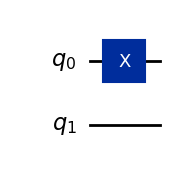

In [3]:
qc.draw("mpl")

To combine two circuits, use the compose method. This accepts another QuantumCircuit and an optional list of qubit mappings.

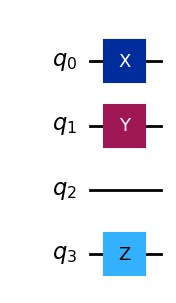

In [4]:
qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)
 
# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")

# Parameterized circuits

Many near-term quantum algorithms involve executing many variations of a quantum circuit. Since constructing and optimizing large circuits can be computationally expensive, Qiskit supports parameterized circuits. These circuits have undefined parameters, and their values do not need to be defined until just before executing the circuit. This lets you move circuit construction and optimization out of the main program loop. The following cell creates and displays a parameterized circuit.

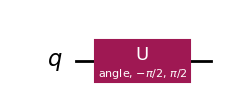

In [5]:
from qiskit.circuit import Parameter
angle = Parameter("angle")  # undefined number
 
#¬†Create and optimize circuit once
qc = QuantumCircuit(1)
qc.rx(angle, 0)
 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
qc = generate_preset_pass_manager(optimization_level=3, basis_gates=['u', 'cx']).run(qc)
 
qc.draw("mpl")

The following cell creates many variations of this circuit and displays one of the variations.

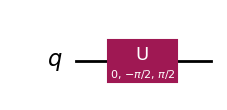

In [8]:
circuits = []
for value in range(100):
    circuits.append(
        qc.assign_parameters({ angle: value })
    )
 
circuits[0].draw("mpl")

# Circuit library

The Qiskit SDK includes a library of popular circuits to use as building blocks in your own programs. Using pre-defined circuits saves time researching, writing code, and debugging. The library includes popular circuits in quantum computing, circuits that are difficult to simulate classically, and circuits useful for quantum hardware benchmarking.

# Standard gates

The circuit library also includes standard quantum gates. Some are more fundamental gates (such as the UGate), and others are multi-qubit gates that usually need building from single- and two-qubit gates. To add imported gates to your circuit, use the append method; the first argument is the gate, and the next argument is a list of qubits to apply the gate to.

For example, the following code cell creates a circuit with a Hadamard gate and a multi-controlled-X gate.

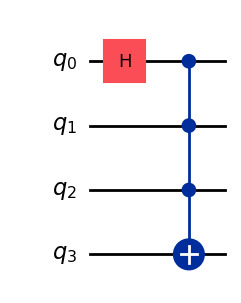

In [9]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0,1,2,3])
qc.draw('mpl')

# N-local circuits

These circuits alternate layers of single-qubit rotation gates with layers of multi-qubit entangling gates.

This family of circuits is popular in variational quantum algorithms because they can produce a wide range of quantum states. Variational algorithms adjust the gate parameters to find states that have certain properties (such as states that represent a good solution to an optimization problem). For this purpose, many circuits in the library are parameterized, which means you can define them without fixed values.

The following code cell imports a TwoLocal circuit, in which the entangling gates are two-qubit gates. This circuit interleaves blocks of parameterized single-qubit gates, followed by entangling blocks of two-qubit gates.

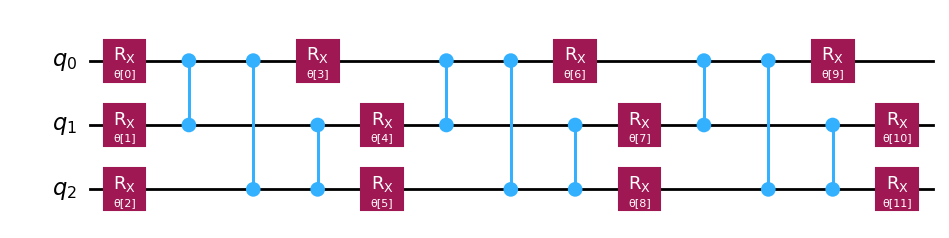

In [10]:
from qiskit.circuit.library import TwoLocal

two_local = TwoLocal(3, 'rx', 'cz')
two_local.decompose().draw('mpl')

You can also assign these parameters to real values using a dictionary of the form { Parameter: number }. To demonstrate, the following code cell assigns each parameter in the circuit to 0.

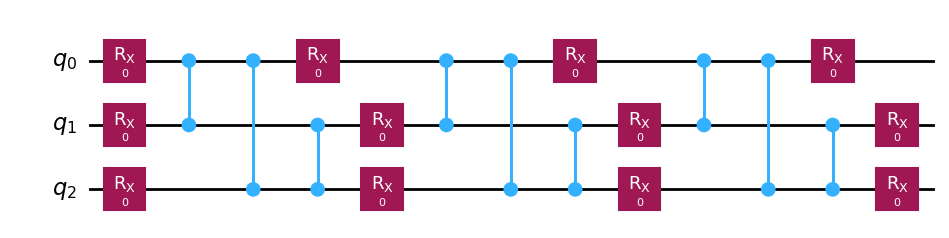

In [11]:
bound_circuit = two_local.assign_parameters({ p: 0 for p in two_local.parameters})
bound_circuit.decompose().draw('mpl')

# Data-encoding circuits

These parameterized circuits encode data onto quantum states for processing by quantum machine learning algorithms. Some circuits supported by Qiskit are:

- Amplitude encoding, which encodes each number into the amplitude of a basis state. This can store $2^n$ numbers in a single state, but can be costly to implement.

- Basis encoding, which encodes an integer ùëò by preparing the corresponding basis state ‚à£k‚ü©.

- Angle encoding, which sets each number in the data as a rotation angle in a parameterized circuit.

The best approach depends upon the specifics of your application. On current quantum computers, however, we often use angle-encoding circuits such as the ZZFeatureMap.

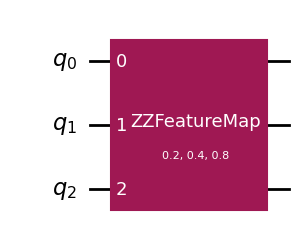

In [12]:
from qiskit.circuit.library import ZZFeatureMap
 
features = [0.2, 0.4, 0.8]
feature_map = ZZFeatureMap(feature_dimension=len(features))
 
encoded = feature_map.assign_parameters(features)
encoded.draw('mpl')

There are many other circuits in the library such as:

- Time-evolution circuits
- Benchmarking and complexity-theory circuits
- Arithmetic circuits

More information in Qiskit documentation: https://docs.quantum.ibm.com/build/circuit-library

# Specify observables in the Pauli basis

In quantum mechanics, observables correspond to physical properties that can be measured. When considering a system of spins, for example, you could be interested in measuring the system's energy or obtaining information about the alignment of the spins, such as the magnetization or the correlations between spins.

To measure an n-qubit observable O on a quantum computer, you must represent it as a sum of tensor products of Pauli operators, that is

$$ O = \sum_{k=1}^K \alpha_k P_k$$ 

where $P_k \in \{ I, X, Y, Z \}^{\otimes n}, \alpha_k \in \mathbb{R}$. The standard Pauli matrices are:

$$ I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}, X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$

and you use the fact that an observable is Hermitian, as in $O^\dag = O$, If O is not Hermitian it can still be decomposed as a sum of Paulis, but the coefficient $\alpha_k$ becomes complex.

In many cases, the observable is naturally specified in this representation after mapping the system of interest to qubits. For example, a spin-1/2 system can be mapped to an Ising Hamiltonian,

$$ H = \sum_{<i,j>} Z_i Z_j - \sum_{i=1}^n X_i $$

where the indices ‚ü®i,j‚ü© run over interacting spins and the spins are subject to a transversal field in X. The subscript index indicates which qubit the Pauli operator acts on, i.e. $X_i$ applies an X operator on qubit i and leaves the rest unchanged. In the Qiskit SDK, this Hamiltonian could be constructed as

In [13]:
from qiskit.quantum_info import SparsePauliOp
# define the number of qubits
n = 12
 
# define the single Pauli terms as ("Paulis", [indices], coefficient)
interactions = [("ZZ", [i, i + 1], 1) for i in range(n - 1)]  # we assume spins on a 1D line
field = [("X", [i], -1) for i in range(n)]
 
# build the operator
hamiltonian = SparsePauliOp.from_sparse_list(interactions + field, num_qubits=n)

For observables that are not given in terms of Pauli operators but in a matrix for, we first have to reformulate them in the Pauli basis in order to evaluate them on a quantum computer. We are always able to find such a representation as the Pauli matrices form a basis for the Hermitian $2^n \times 2^n$ matrices. We expand the observable O as

$$ O = \sum_{P \in \{ I, X, Y, Z \}^{\otimes n}} Tr(OP)P $$

where the sum runs over all possible n-qubit Pauli terms and Tr(‚ãÖ) is the trace of a matrix, which acts as inner product. You can implement this decomposition from a matrix to Pauli terms using the SparsePauliOp.from_operator method, like so:

In [14]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp
 
matrix = np.array([[-1, 0, 0.5, -1],
		   [0, 1, 1, 0.5],
		   [0.5, 1, -1, 0],
		   [-1, 0.5, 0, 1]])
 
observable = SparsePauliOp.from_operator(matrix)
print(observable)  

SparsePauliOp(['IZ', 'XI', 'YY'],
              coeffs=[-1. +0.j,  0.5+0.j,  1. -0.j])


# Transpilation 

Transpilation is the process of rewriting a given input circuit to match the topology of a specific quantum device, and optimize the circuit instructions for execution on noisy quantum systems.

Qiskit's prebuilt transpiler pipeline consists of six fundamental stages:

1. init - This pass runs any initial passes that are required before we start embedding the circuit to the system. This typically involves unrolling custom instructions and converting the circuit to all single- and two-qubit gates. (By default this will just validate the circuit instructions and translate multi-qubit gates into single- and two-qubit gates.)

2. layout - This pass applies a layout, mapping/assigning the virtual qubits in your circuit to the physical qubits of a system.

3. routing - This pass runs after a layout has been applied and will inject gates (that is, SWAPs) in the original circuit in order to make it compatible with the system's connectivity/coupling map.

4. translation - This pass translates the gates in the circuit to the system's basis set of instructions.

5. optimization - This pass runs an optimization loop to find more efficient decompositions of your quantum circuit until a condition is met (such as a fixed depth).

6. scheduling - This stage is for any hardware-aware scheduling passes. If the user specifies a scheduling method, this stage accounts for all idle time in the circuit.

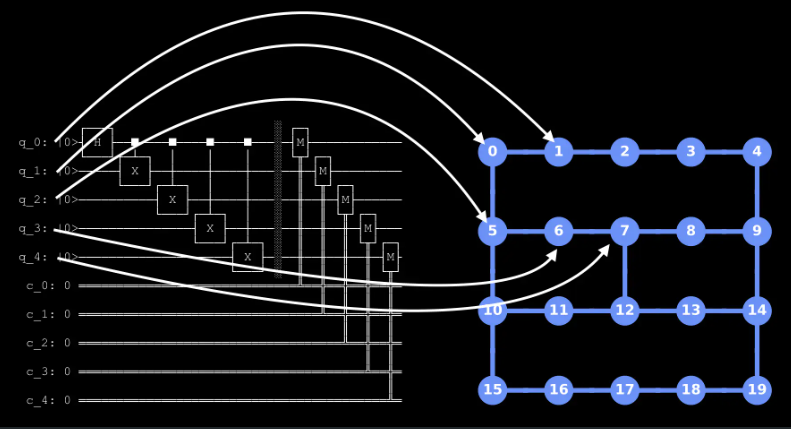

# Transpilation default settings and configuration options

Abstract circuits need to be transpiled because systems have a limited set of basis gates and cannot execute arbitrary operations. The transpiler's function is to change arbitrary circuits so that they can run on a specified system. This is done by translating the circuits to the supported basis gates, and by introducing SWAP gates as needed, so that the circuit's connectivity matches that of the system.

You can create a pass manager using the "generate_preset_pass_manager" function and pass a circuit or list of circuits to its run method to transpile them. You can call "generate_preset_pass_manager" passing only the optimization level and backend, choosing to use the defaults for all other options, or you can pass additional arguments to the function to fine-tune the transpilation.

# Basic usage without parameters

In this example, we pass a circuit and target system to the transpiler without specifying any further parameters.

Create a circuit and view the result:

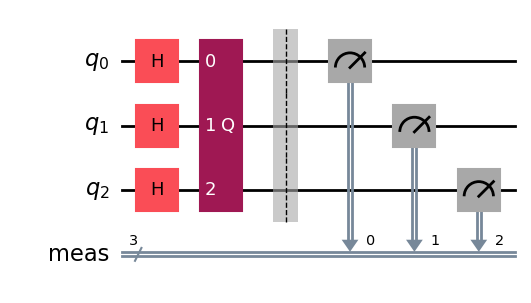

In [15]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, Diagonal
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
 
# Create circuit to test transpiler on
oracle = Diagonal([1] * 7 + [-1])
qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc = qc.compose(GroverOperator(oracle))
 
# Add measurements to the circuit
qc.measure_all()
 
# View the circuit
qc.draw(output='mpl')

Transpile the circuit and view the result:

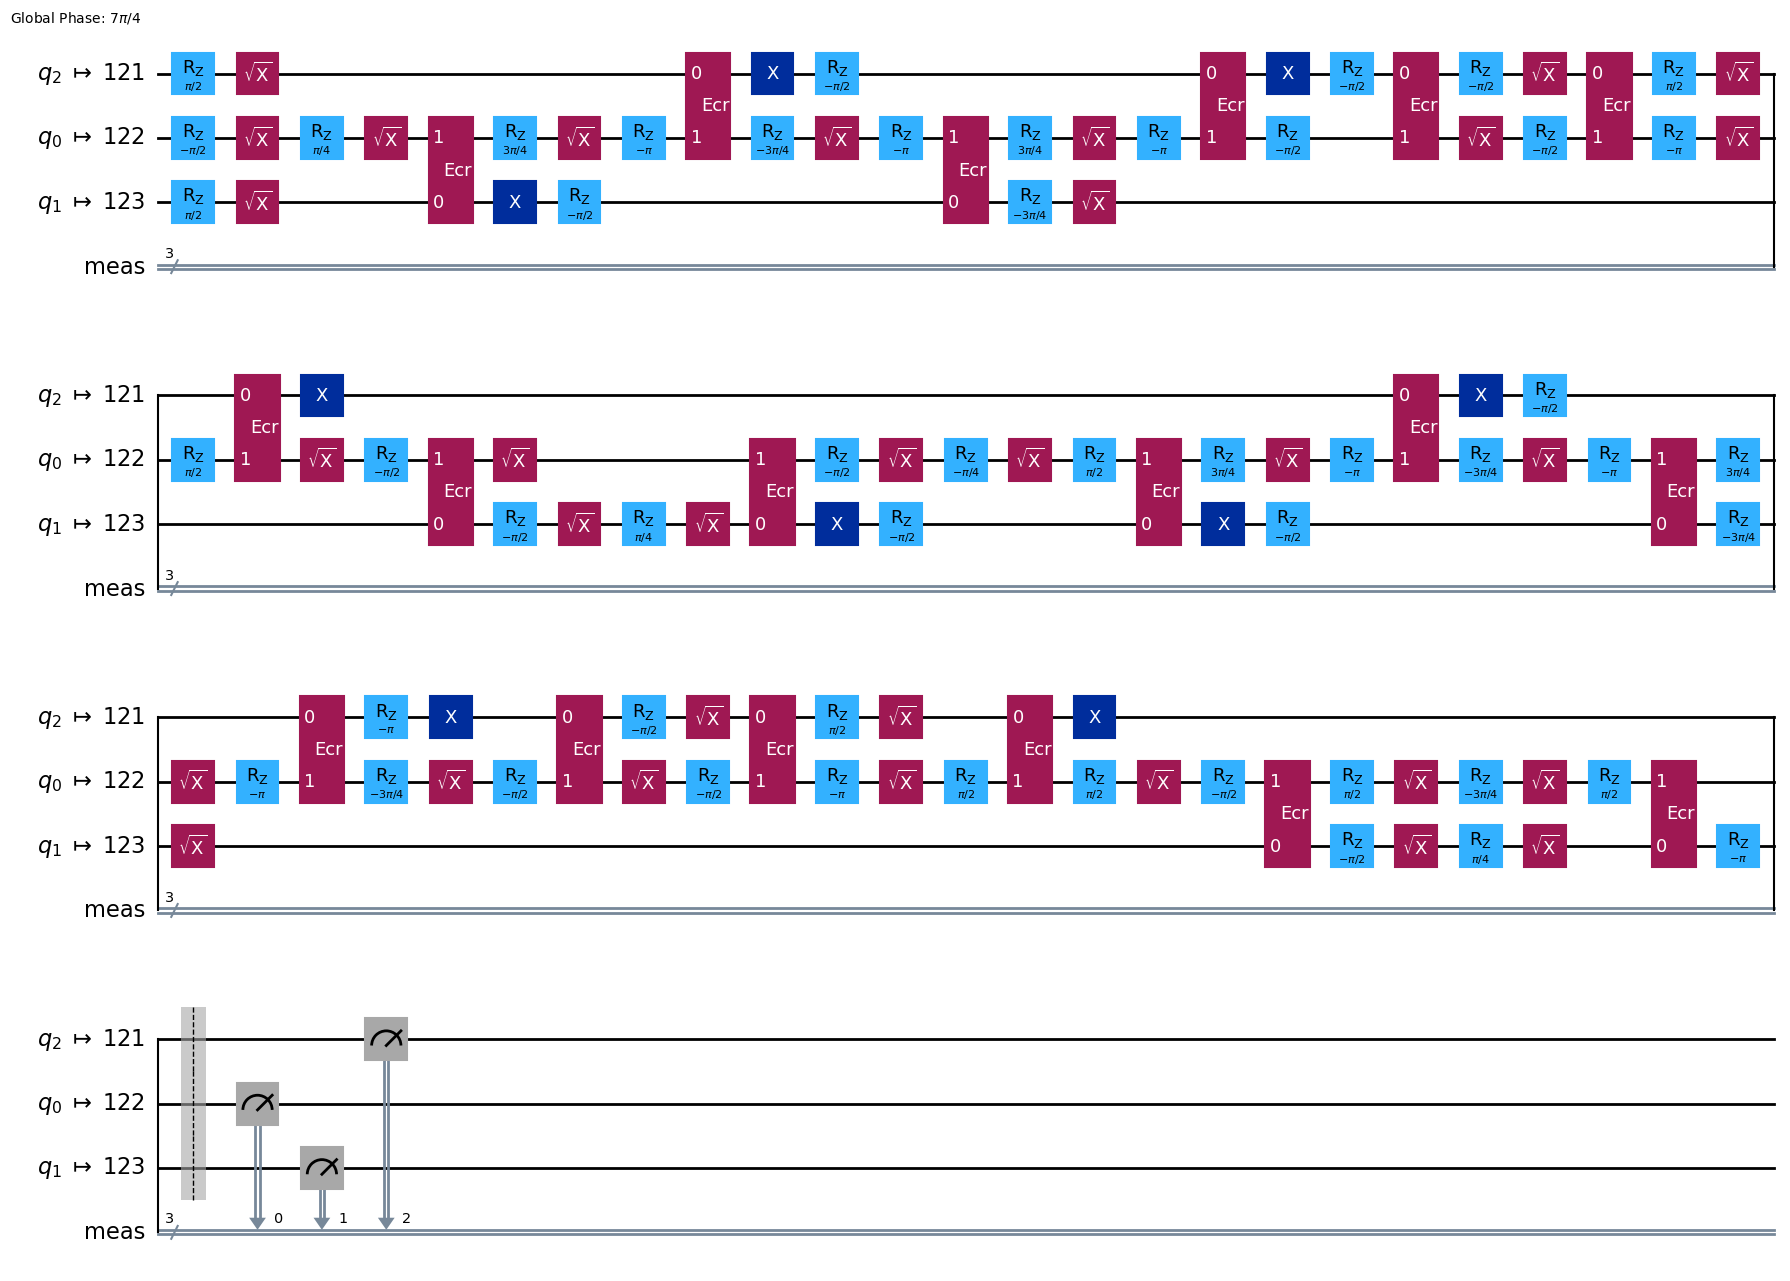

In [16]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
# Specify the system to target
backend = FakeSherbrooke()
 
# Transpile the circuit
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
transpiled_circ = pass_manager.run(qc)
 
# View the transpiled circuit
transpiled_circ.draw(output='mpl', idle_wires=False)